In [2]:
# Importing libraries ....
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io

In [3]:
# Converting Image to Greyscale ....
from PIL import Image
img = Image.open('ppf1_enhanced.gif').convert('LA')
img.save('greyscale.gif')

# Loading Image ....
Img_Original = io.imread('greyscale.gif')

In [4]:
# Converting Greyscale Image to Binary Image ....
from skimage.filters import threshold_otsu
Otsu_Threshold = threshold_otsu(Img_Original)

# Setting object region as 1 and background region as 0 ....
BW_Original = Img_Original < Otsu_Threshold

In [5]:
# Function to return 8-neighbours of image point P1(x,y) in a clockwise order ....

#                P9 P2 P3
#                P8 P1 P4
#                P7 P6 P5

def neighbours(x,y,image):
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
    return [ img[x_1][y],img[x_1][y1],img[x][y1],img[x1][y1],         # P2,P3,P4,P5
            img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9

In [6]:
# Function to count no. of transitions from 0 to 1 in the ordered sequence ....

def transitions(neighbours):
    n = neighbours + neighbours[0:1]      # P2,P3,...,P8,P9,P2
    return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3),(P3,P4),...,(P8,P9),(P9,P2)

In [7]:
# Zhang-Suen Thinning Algorithm ....

def zhangSuen(image):
    Image_Thinned = image.copy()  # Making copy to protect original image
    changing1 = changing2 = 1
    while changing1 or changing2:   # Iterates until no further changes occur in the image
        # Step 1
        changing1 = []
        rows, columns = Image_Thinned.shape
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1     and    # Condition 0: Point P1 in the object regions 
                    2 <= sum(n) <= 6   and    # Condition 1: 2<= N(P1) <= 6
                    transitions(n) == 1 and    # Condition 2: S(P1)=1  
                    P2 * P4 * P6 == 0  and    # Condition 3   
                    P4 * P6 * P8 == 0):         # Condition 4
                    changing1.append((x,y))
        for x, y in changing1: 
            Image_Thinned[x][y] = 0
        # Step 2
        changing2 = []
        for x in range(1, rows - 1):
            for y in range(1, columns - 1):
                P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                if (Image_Thinned[x][y] == 1   and        # Condition 0
                    2 <= sum(n) <= 6  and       # Condition 1
                    transitions(n) == 1 and      # Condition 2
                    P2 * P4 * P8 == 0 and       # Condition 3
                    P2 * P6 * P8 == 0):            # Condition 4
                    changing2.append((x,y))    
        for x, y in changing2: 
            Image_Thinned[x][y] = 0
    return Image_Thinned

In [10]:
# Applying Zhang-Suen Thinning Algorithm to image ....
BW_Skeleton = zhangSuen(BW_Original)
import numpy as np
BW_Skeleton = np.invert(BW_Skeleton)

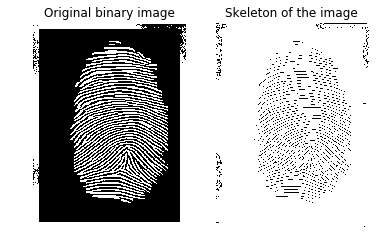

In [11]:
# Displaying the results ....
fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.ravel()
ax1.imshow(BW_Original, cmap=plt.cm.gray)
ax1.set_title('Original binary image')
ax1.axis('off')
ax2.imshow(BW_Skeleton, cmap=plt.cm.gray)
ax2.set_title('Skeleton of the image')
ax2.axis('off')
plt.show()

In [12]:
# Saving the Skeleton image ....
from scipy.misc import toimage
Thinned = toimage(BW_Skeleton)
Thinned.save('thinned_image.gif')